In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('countries.csv')
df

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [3]:
df.isnull().sum()

country      1
latitude     1
longitude    1
name         0
dtype: int64

In [4]:
def numberic(dataframe: pd.DataFrame):
    df = dataframe.copy()
    for key in df.keys():
        if df[key].dtype == object:
            df[key] = LabelEncoder().fit_transform(df[key])

    return df

In [5]:
df['country'].fillna(df['country'].mode()[0], inplace = True)

In [7]:
def replace_Nan_data(dataframe: pd.DataFrame) -> pd.DataFrame:
    df = dataframe.copy()
    for key in df.keys():
        if df[key].isnull().sum() > 0:
            df[key].fillna(round(df[key].median()), inplace=True)
    return df

In [8]:
df=replace_Nan_data(df)

In [9]:
#cau 1
import plotly.express as px 

pig=px.scatter(df,x = 'latitude', y = 'longitude', color = 'country')
pig.show()

In [9]:
df=numberic(df)
del df['country']


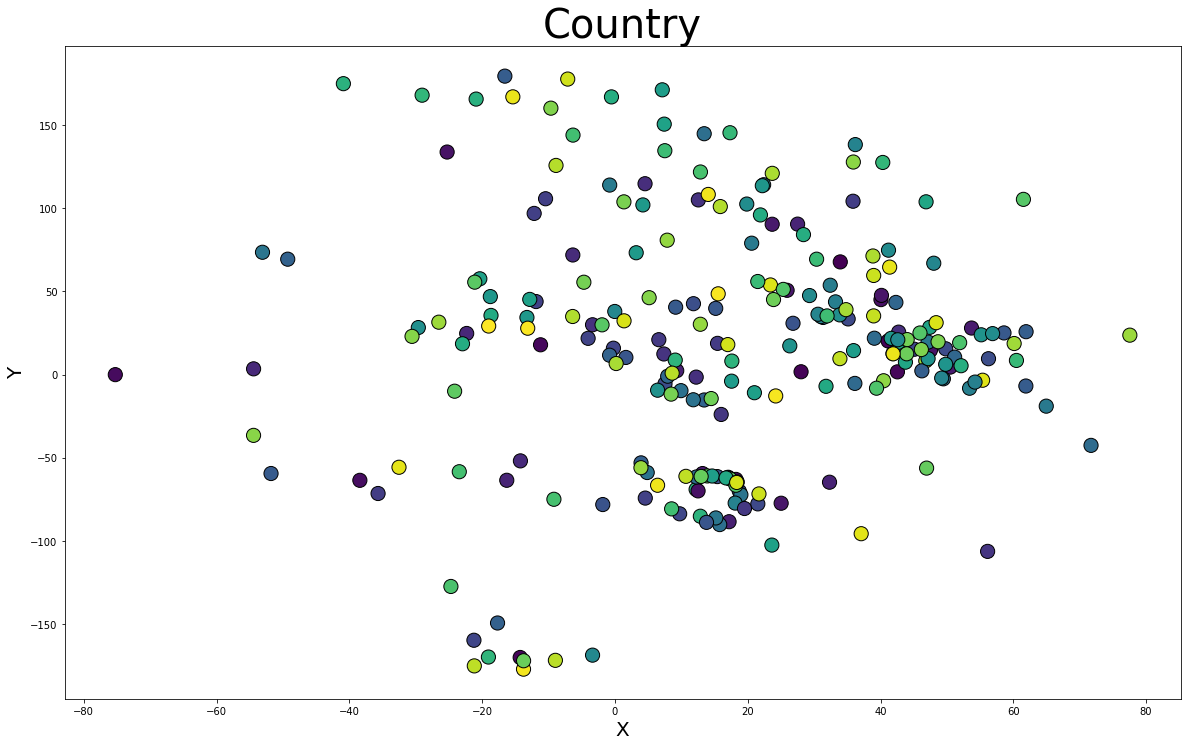

In [10]:
#cau2
from sklearn.cluster import DBSCAN
from sklearn import metrics
data_arr = np.array(df)
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=df.iloc[:,2], marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title("Country", fontsize=40)
plt.show()


In [11]:
#kmean
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4)
y_pred = kmeans.fit_predict(df.iloc[:,[0,1]])



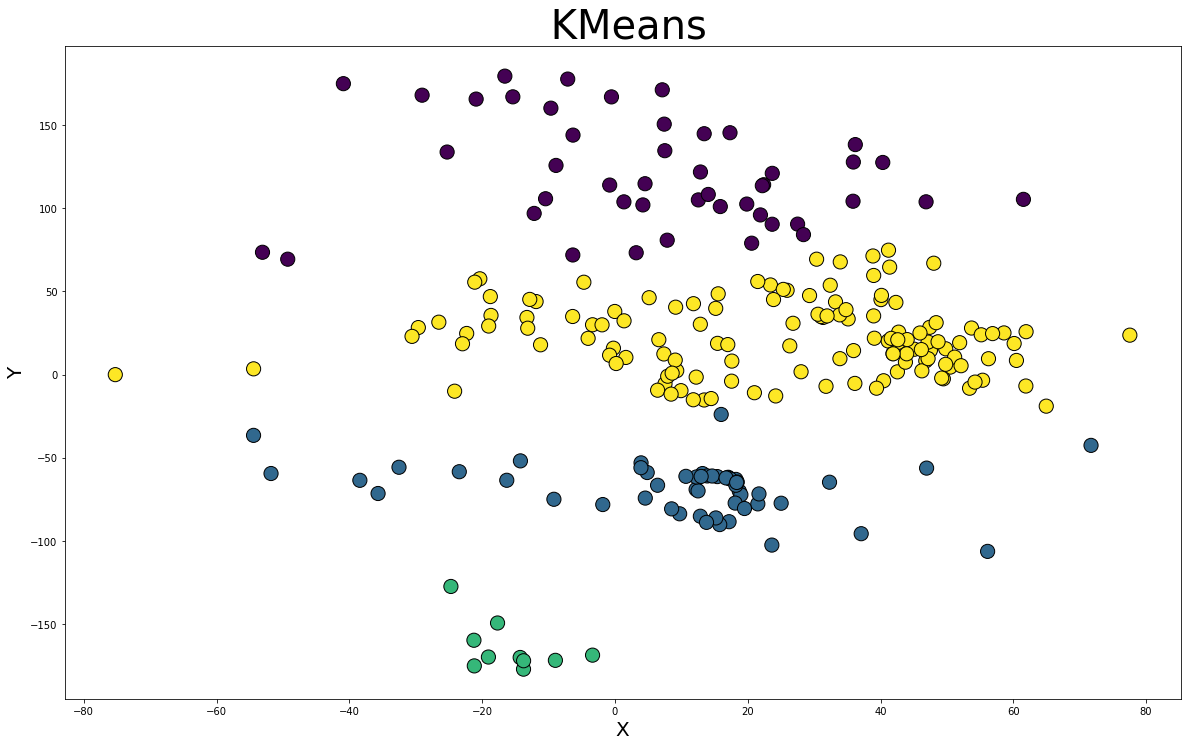

In [12]:
# Show kết quả phân cụm
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(" KMeans", fontsize=40)
plt.show()

0.246855178843329


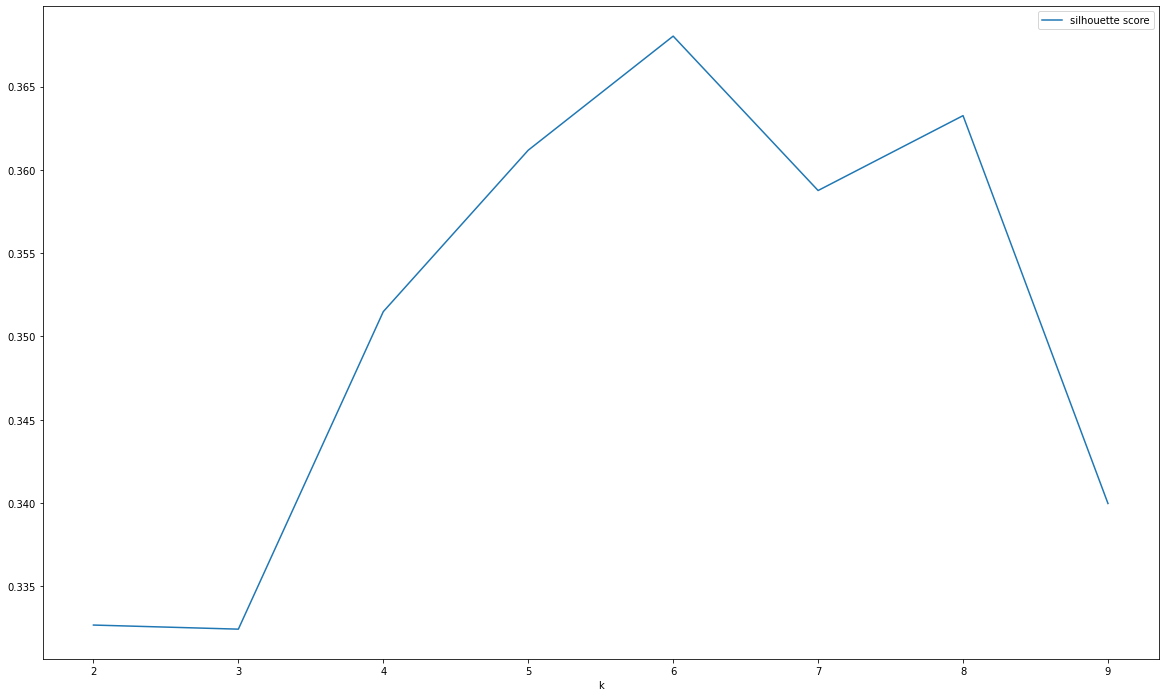

In [13]:
print(metrics.silhouette_score(df,y_pred))
from sklearn.metrics.cluster import silhouette_score
k_values = []
silhouette_score_values = []

for i in range(2,10):
  kmeans = KMeans(n_clusters=i)
  y_pred = kmeans.fit_predict(df)
  k_values.append(i)
  silhouette_score_values.append(metrics.silhouette_score(df, y_pred))
result = pd.DataFrame({'k': k_values, 'silhouette score': silhouette_score_values})
result.plot.line(x='k', y = 'silhouette score', figsize=(20,12))
plt.show()

In [14]:
#DBSCAN
import ipywidgets as widgets

In [15]:
db = DBSCAN(eps=35, min_samples=5).fit(df)
y_pred_DB = db.fit_predict(df)

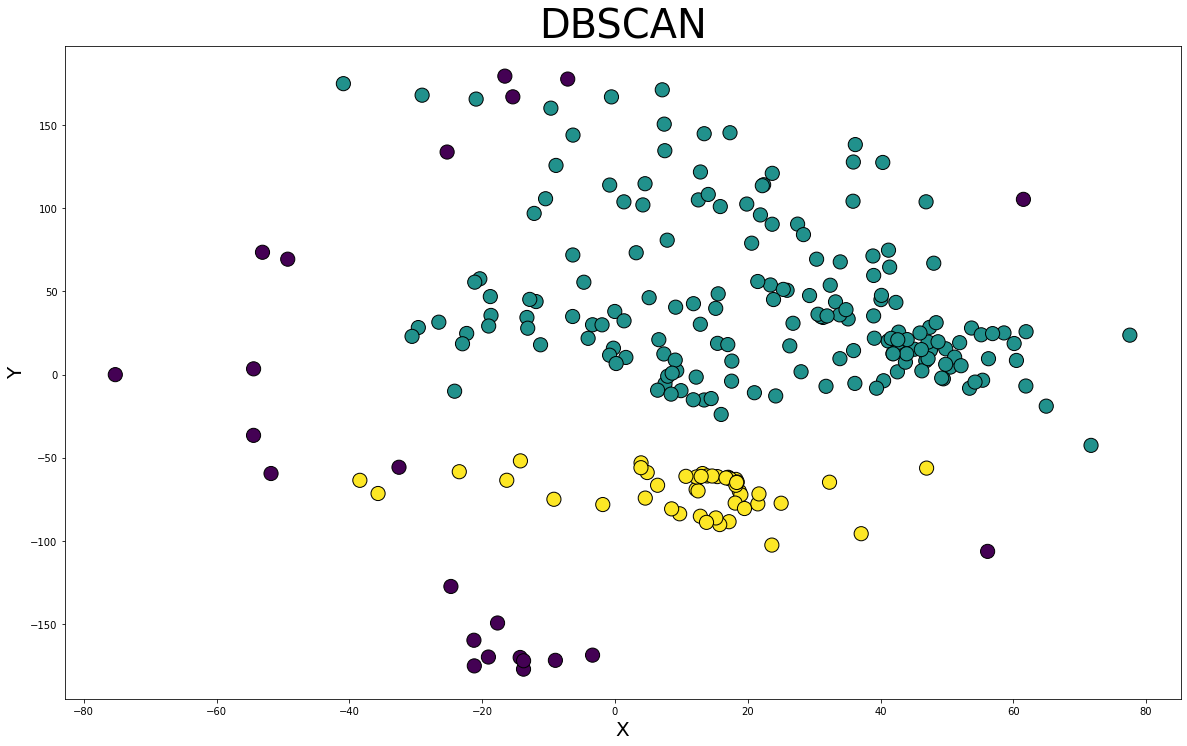

In [16]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:, 0], data_arr[:, 1],
    c=y_pred_DB, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X",fontsize=20)
plt.ylabel("Y",fontsize=20)
plt.title("DBSCAN", fontsize=40)
plt.show()

In [20]:
# DPC
from dpca import DensityPeakCluster
dpca = DensityPeakCluster(density_threshold=8, distance_threshold=5, anormal=False)
dpca.fit(df.iloc[:,[0,1]])

In [21]:
rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()


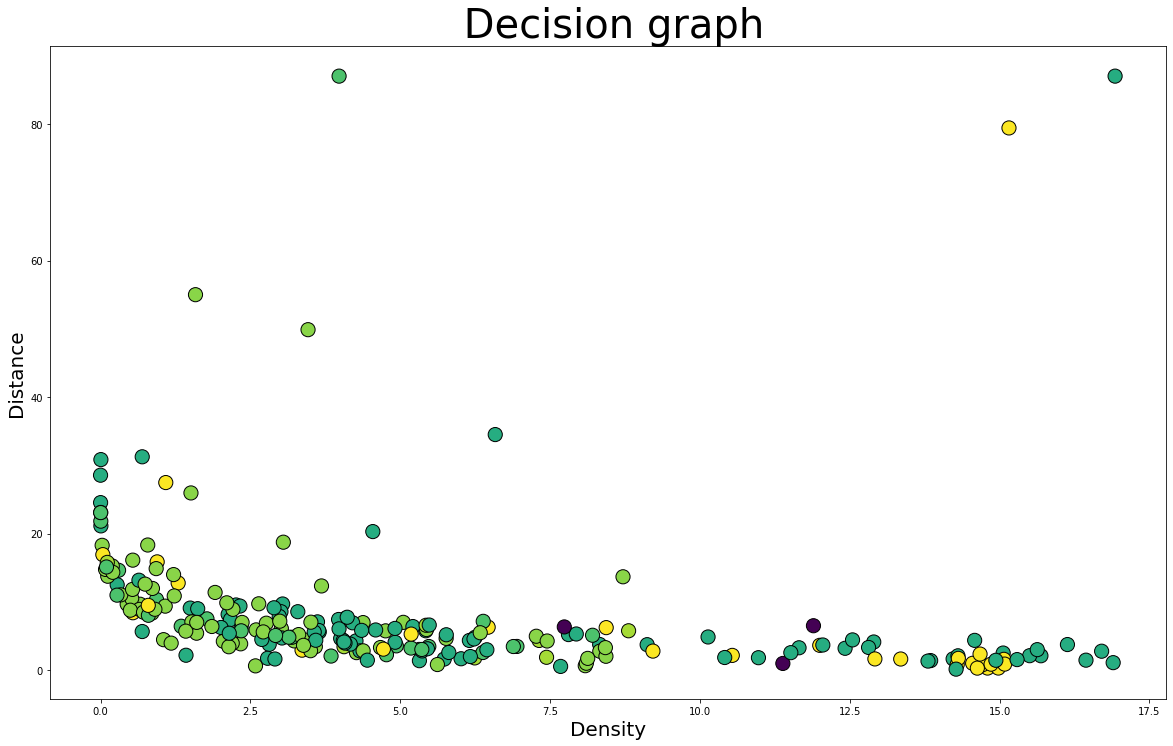

In [23]:
plt.figure(figsize=(20,12))
plt.scatter(
    rho,delta,
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("Density", fontsize=20)
plt.ylabel("Distance", fontsize=20)
plt.title(" Decision graph", fontsize=40)
plt.show()

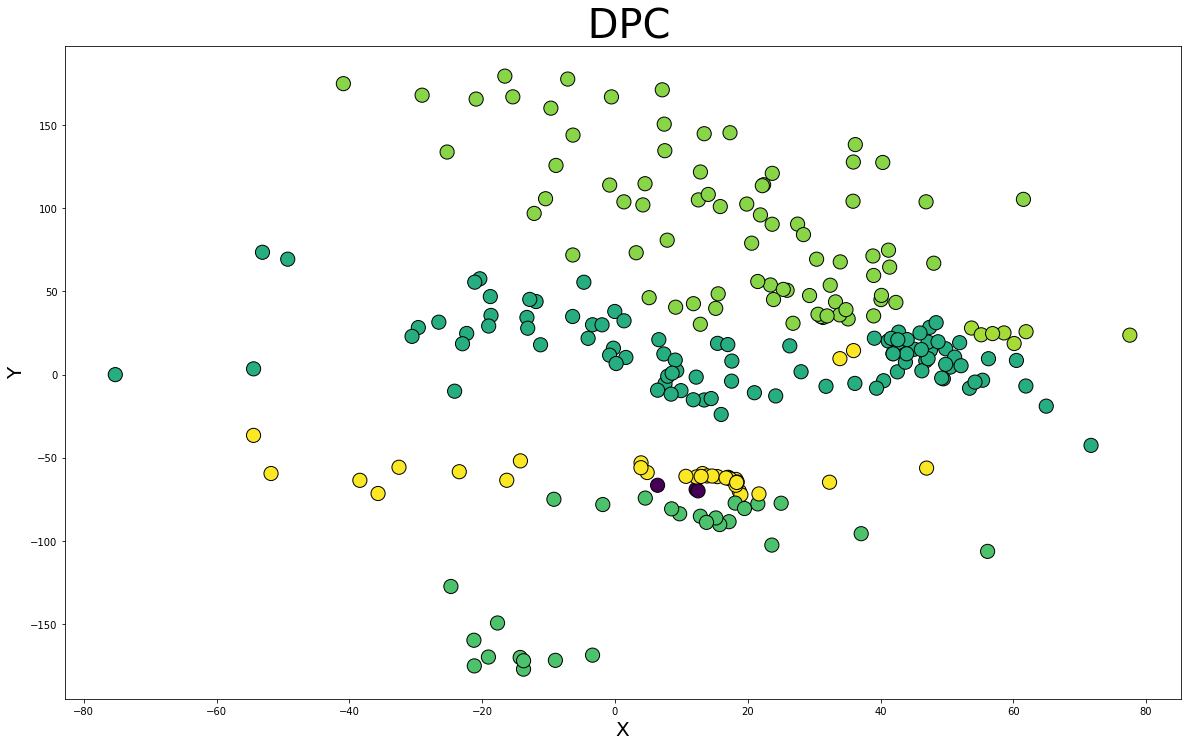

In [24]:
plt.figure(figsize=(20,12))
plt.scatter(
    data_arr[:,0],data_arr[:,1],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("X", fontsize=20)
plt.ylabel("Y", fontsize=20)
plt.title(" DPC", fontsize=40)
plt.show()